In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
from predicting_bike_usage.config import INTERIM_DATA_DIR
from predicting_bike_usage.visualization import visualize
from highlight_text import fig_text
from matplotlib import pyplot as plt
from predicting_bike_usage.features import add_weekend_feature

2025-01-20 11:04:25.374 | INFO     | predicting_bike_usage.config:<module>:11 - PROJ_ROOT path is: /home/daniel/Projects/predicting-bike-usage


In [3]:
bike_df = pd.read_csv(INTERIM_DATA_DIR / "train_dataset.csv")

In [4]:
bike_df = add_weekend_feature(bike_df)

In [5]:
bike_df.head()

Rented Bike Count  Hour  Temperature  Humidity  Wind speed  Visibility  \
0                995    15         13.2        61         3.9         719   
1               1195     9         22.9        86         1.7         538   
2               1448    19         11.2        46         1.4         869   
3                178    23         -2.6        69         2.0        1434   
4               1980    22         27.2        73         1.5        1005   

   Dew point temperature  Solar Radiation  Rainfall  Snowfall Seasons  \
0                    5.8             1.03       0.0       0.0  Autumn   
1                   20.4             0.76       0.0       0.0  Summer   
2                    0.0             0.00       0.0       0.0  Autumn   
3                   -7.5             0.00       0.0       0.0  Winter   
4                   21.9             0.00       0.0       0.0  Summer   

      Holiday Functioning Day  is_weekend  
0  No Holiday             Yes           0  
1  No Holiday             Yes           0  
2  No Holiday             Yes           0  
3  No Holiday             Yes           0  
4  No Holiday             Yes           0

In [6]:
numeric_features = ["Rented Bike Count", "Hour", "Temperature", "Humidity",
                     "Wind speed", "Visibility", "Dew point temperature",
                     "Solar Radiation", "Rainfall", "Snowfall"]

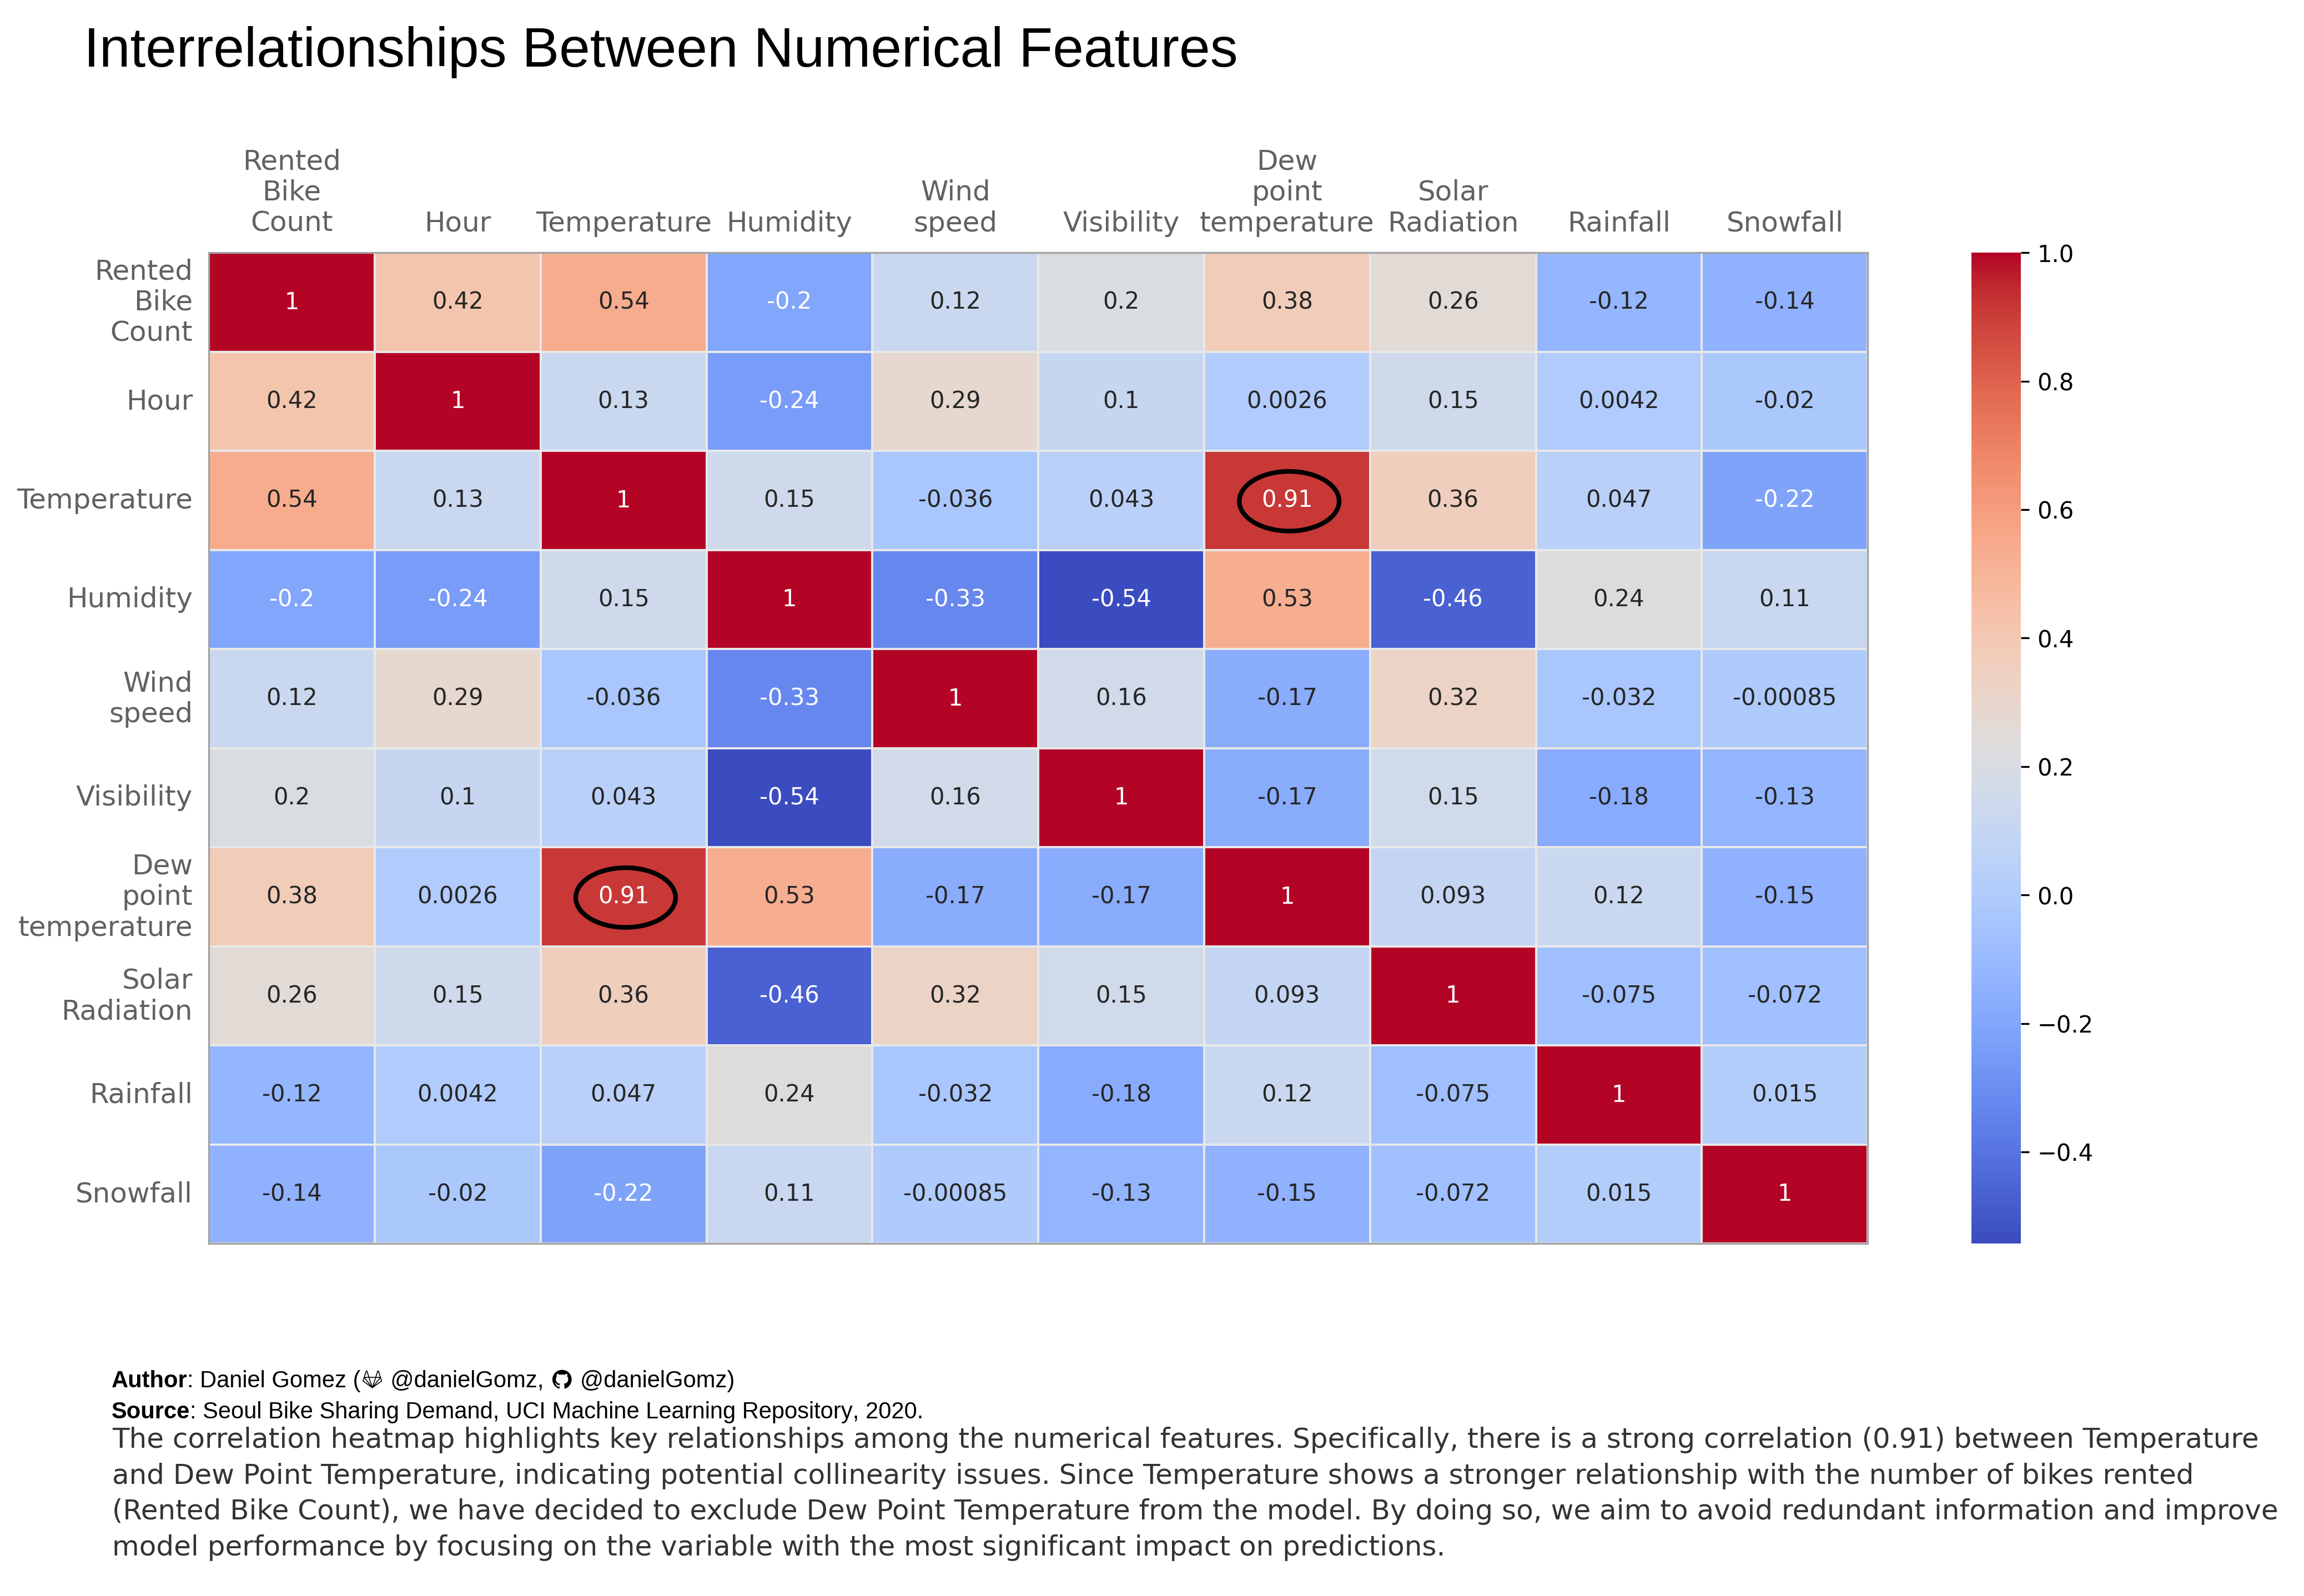

In [7]:
visualize.correlation_heatmap(
    bike_df[numeric_features],
    title="Interrelationships Between Numerical Features",
    annotations=[
        {
            "text": "       ",
            "xy": (6.35, 2.58),
            "with_box": True,
            "box_style": {
                "boxstyle": "ellipse",
                "facecolor": "none",
                "edgecolor": "black",
                "linewidth": 2,
            },
        },
        {
            "text": "       ",
            "xy": (2.35, 6.58),
            "with_box": True,
            "box_style": {
                "boxstyle": "ellipse",
                "facecolor": "none",
                "edgecolor": "black",
                "linewidth": 2,
            },
        },
    ],
)
fig_text(
    s='''The correlation heatmap highlights key relationships among the numerical features. Specifically, there is a strong correlation (0.91) between Temperature
and Dew Point Temperature, indicating potential collinearity issues. Since Temperature shows a stronger relationship with the number of bikes rented
(Rented Bike Count), we have decided to exclude Dew Point Temperature from the model. By doing so, we aim to avoid redundant information and improve
model performance by focusing on the variable with the most significant impact on predictions.
''',
    x=0.03125, y=-0.18,
    fontsize='12',
    color='#333333',
    ha='left', va='bottom'
)